# DJai

### Import Packages

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
from closely_related_key import close_key

### Initiate Graph

In [38]:
G = nx.Graph()

songs = [
    { "id": 1, "key": "C", "bpm": 133 },
    { "id": 2, "key": "G", "bpm": 136 },
    { "id": 3,"key": "D", "bpm": 134 },
    { "id": 4,"key": "Em", "bpm": 137 },
    { "id": 5,"key": "G", "bpm": 133 } ]

### Add edges

In [39]:
for song in songs:
    rel_key = close_key(song["key"])
    rel_songs = [d for d in songs if d['key'] in rel_key]
    rel_songs.remove(song)
    for e in rel_songs:
        G.add_edge(song["id"], e["id"], weight=abs(song["bpm"] - e["bpm"]))

### Draw edges

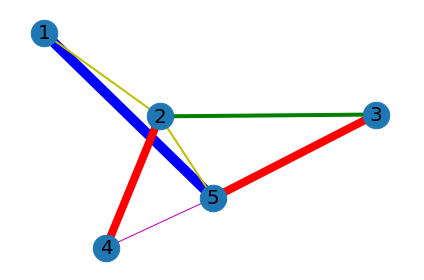

In [42]:
e0 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 0]
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 1]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 2]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 3]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 4]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=e0, width=10, edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e1, width=8, edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=4, edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=2, edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=1, edge_color="m")


# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()